<IPython.core.display.Javascript object>


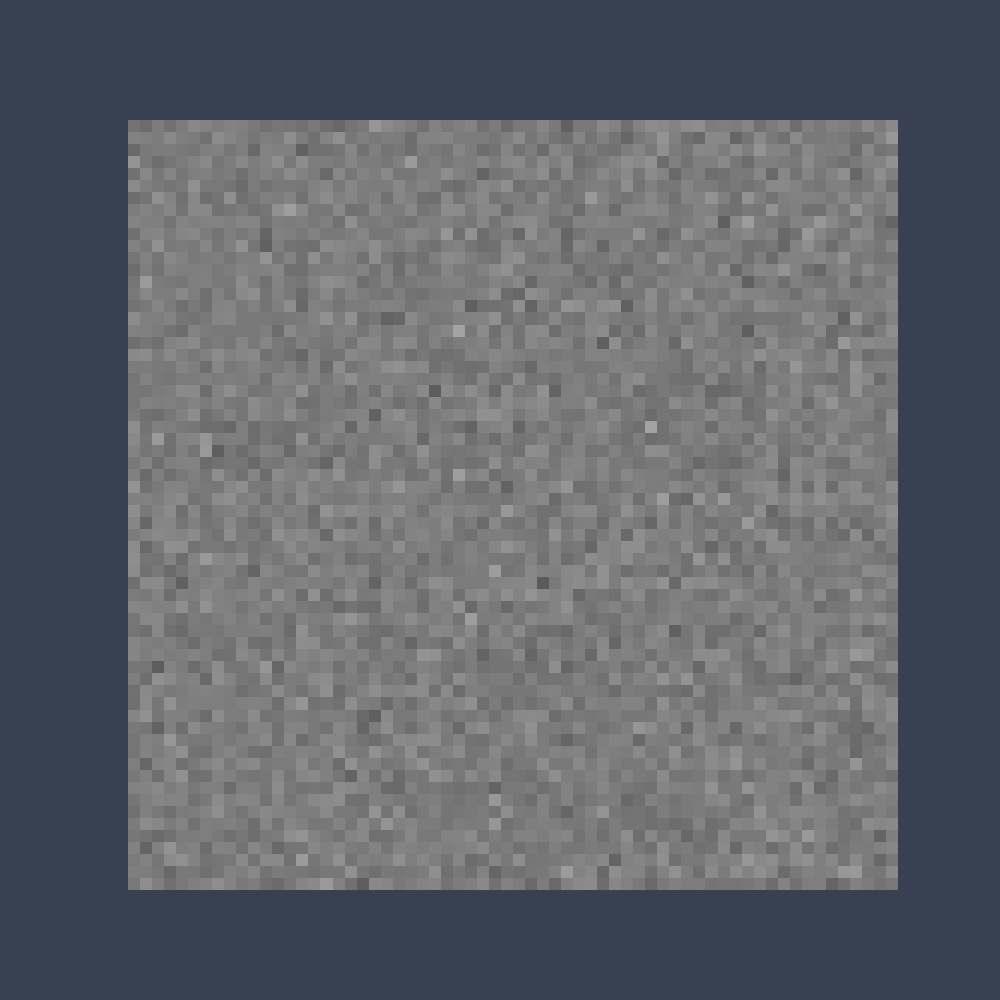

<IPython.core.display.Javascript object>


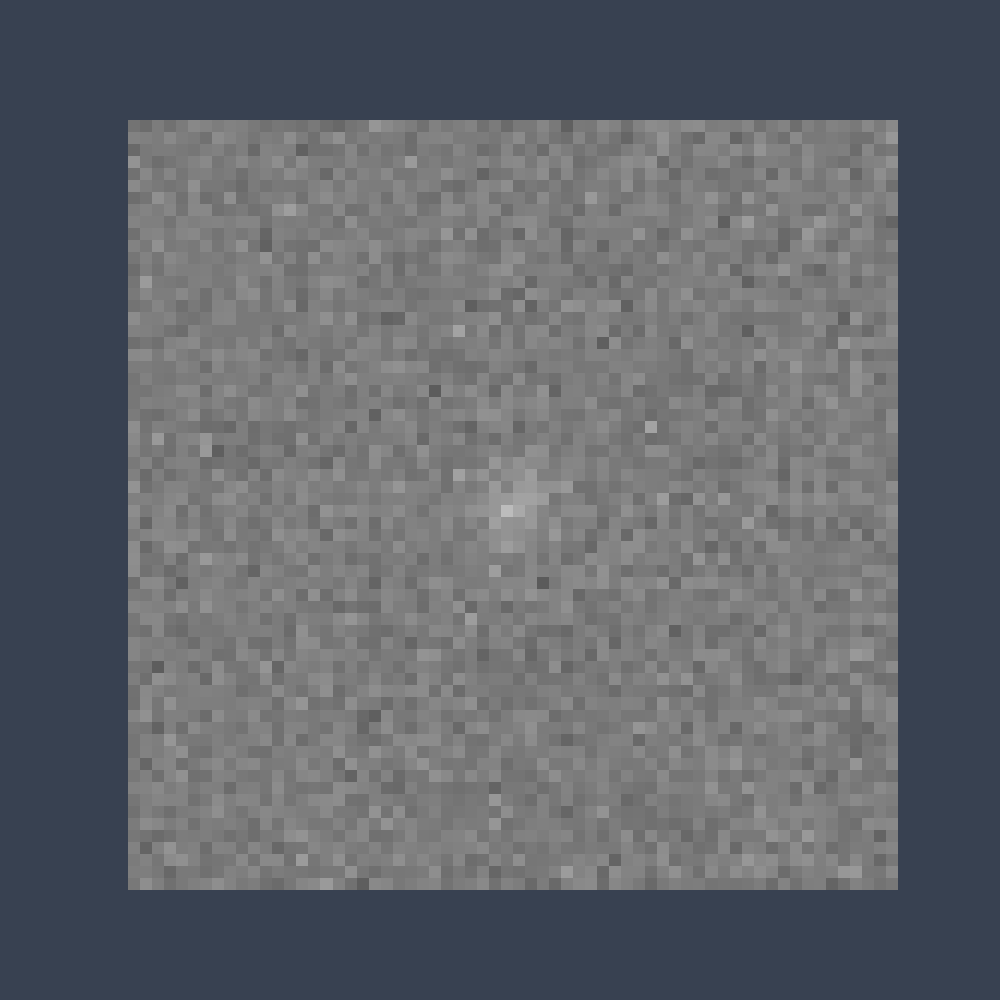

In [1]:
%matplotlib notebook

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

# Set plot theme
jtplot.style()

# Settings
signal_intensity = 100 # set signal intensity
background_intensity = 125  # set background intensity
var_noise = 100 # set var noise
gaussian_sigma = 2 # set sd of gaussian kernel
num_images = 1000 # number of images to create

# Create list to store noise images
noise = []

# Create noise images
for n in range(num_images):
    # Create measurement noise
    noise.append(np.random.normal(0,var_noise**(0.5),(64,64)))

# Create background image
background = snd.filters.gaussian_filter(np.ones((64,64))*background_intensity,gaussian_sigma)

# Create signal image
signal = np.zeros((64,64))
signal[30:34,31:33] = signal_intensity
signal[31:33,30:34] = signal_intensity
signal = snd.filters.gaussian_filter(signal+(np.ones((64,64))*background_intensity),gaussian_sigma)

# Combine background and signal
signal_absent = [background+nse for nse in noise]

# Combine signal + background + noise
signal_present = [signal+nse for nse in noise]

# Display Images (from 1st sample)

# signal absent image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_absent[0],cmap='gray',vmin=0,vmax=255)

# signal present image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_present[0],cmap='gray',vmin=0,vmax=255)
plt.show()

# plot images
plt.show()

<IPython.core.display.Javascript object>


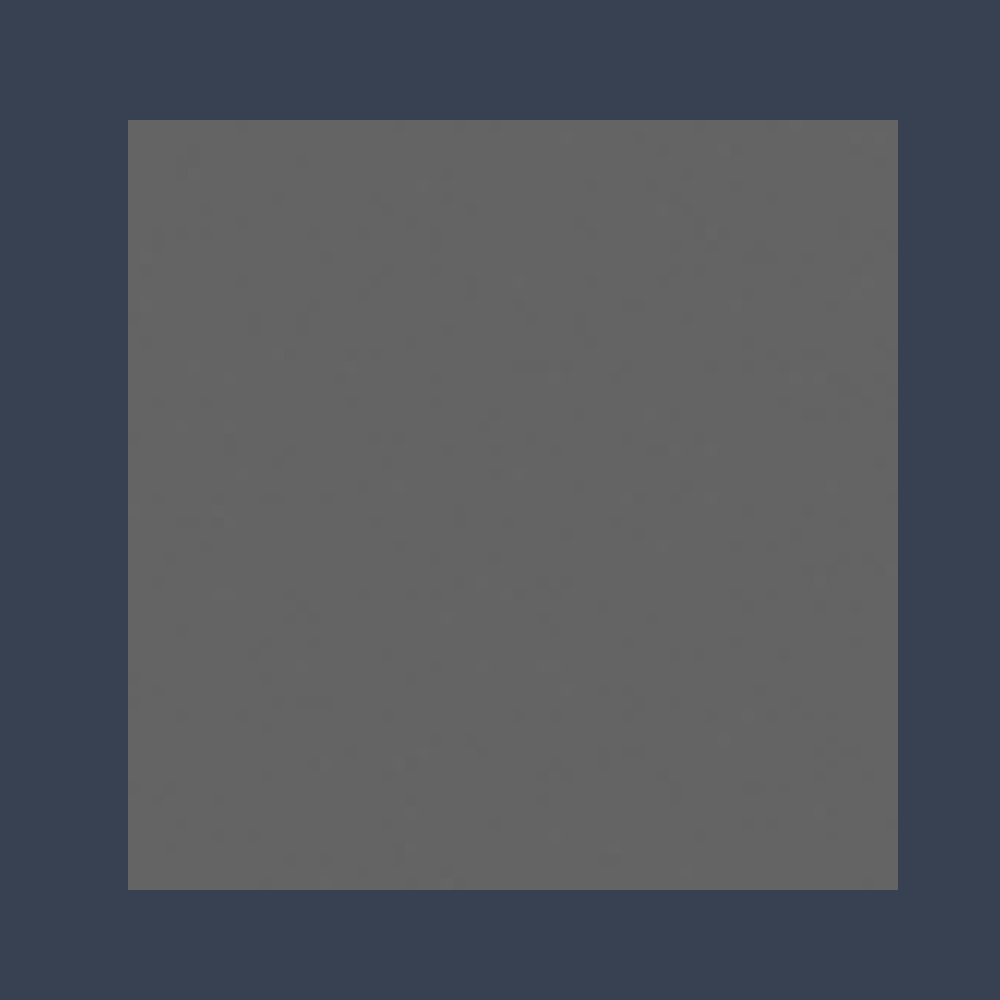

<IPython.core.display.Javascript object>


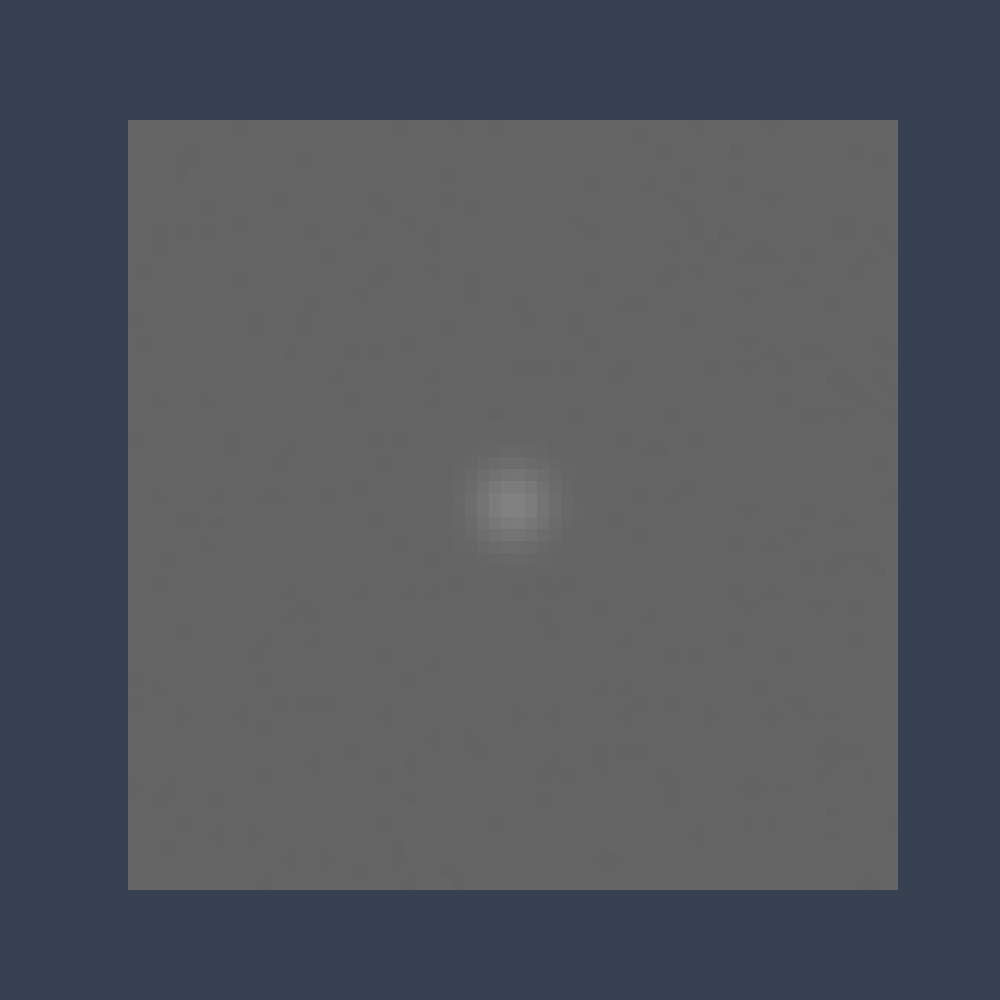

In [2]:
from functools import reduce

# split train/val set
train_signal_absent = signal_absent[0:800]
train_signal_present = signal_present[0:800]
val_signal_absent = signal_absent[800:1000]
val_signal_present = signal_absent[800:1000]

# Generate average images for signal present/signal absent
avg_signal_absent = reduce(lambda x,y:x+y, train_signal_absent)/num_images
avg_signal_present = reduce(lambda x,y:x+y, train_signal_present)/num_images

# avg noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_absent,cmap='gray',vmin=0,vmax=255)

# avg signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_present,cmap='gray',vmin=0,vmax=255)

# plot images
plt.show()

# flatten arrays
noise_array = np.transpose(np.vstack([n.flatten() for n in noise[0:800]]))
avg_signal_absent_array = avg_signal_absent.flatten()
avg_signal_present_array = avg_signal_present.flatten()
val_signal_absent = np.transpose(np.vstack([n.flatten() for n in val_signal_absent]))
val_signal_present = np.transpose(np.vstack([n.flatten() for n in val_signal_present]))

In [3]:
# combine validation images
data_array = np.hstack((val_signal_absent,val_signal_present))

# calculate covariance/inverse covariance matrix
covariance = np.cov(noise_array)
icov = np.linalg.inv(covariance)

# calculate diffence of avg 2 classes
avg_t = avg_signal_present_array-avg_signal_absent_array

# calculate test statistic
l_pw = np.matmul(np.matmul(avg_t,icov),data_array)

[0.    0.005 1.   ]
[0.    0.005 1.   ]
AUC: 0.49999999999999994


<IPython.core.display.Javascript object>


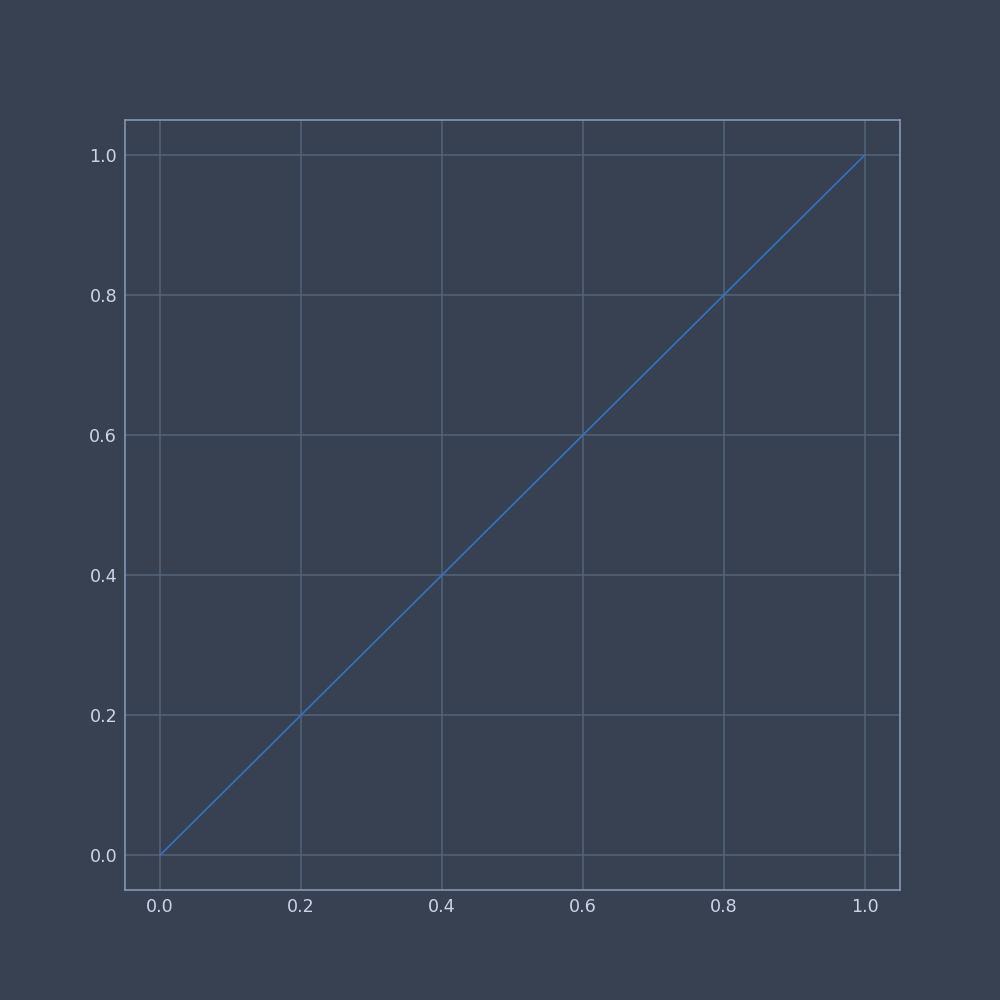

In [6]:
from sklearn.metrics import roc_auc_score,roc_curve

# print performance
img_cls = np.array([0]*200 + [1]*200)
[fpr,tpr,threshold] = roc_curve(img_cls,l_pw)
print(fpr)
print(tpr)
print("AUC: {}".format(roc_auc_score(img_cls,l_pw)))
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.show()